## Results exploration - GMMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
palette ={"Group head": "#3b5b92", "Group mid": "#01889f", "Group tail": "#feb308"}

In [3]:
features_df = pd.read_csv('data/LFM-BeyMS_MRS_features_reco.csv')
tracks_sample = pd.read_csv('data/all_tracks_sample.csv') 
acoustic_features = pd.read_csv('data/acoustic_features_lfm_id.tsv', sep='\t')
reco = pd.read_csv('data/LFM-BeyMS_MRS_experiments_reco.csv')
train_set = pd.read_csv('data/LFM-BeyMS_MRS_experiments_train_set.csv')
test_set = pd.read_csv('data/LFM-BeyMS_MRS_experiments_test_set.csv')
df = pd.read_csv('data/LFM-BeyMS_MRS_experiments_df.csv')

In [4]:
reco['group_name'] = np.select(
    [
        reco['group']==1, 
        reco['group']==2,
        reco['group']==3

    ], 
    [
        'Group head', 
        'Group mid',
        'Group tail'
    ], 
)

In [5]:
reco = reco.rename(columns={'Unnamed: 0':'top'})

In [6]:
reco['top']=reco['top']+1

In [7]:
reco.query('group.isnull()')

,top,track_id,song,Code,group,user_id,precision_val,recall_val,type_test,count,group_name


In [8]:
feat = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "tempo", "valence", "liveness", "idf_scores"]
t_feat = ["track_id", "danceability", "energy", "speechiness", "acousticness", "instrumentalness", "tempo", "valence", "liveness", "idf_scores"]

In [9]:
reco_stat_beyms_idf = reco.query('type_test=="beyms_idf"').groupby(['user_id','group_name']).size().reset_index()
reco_stat_beyms_idf = reco_stat_beyms_idf.rename(columns={0:'count'})
user_grp_beyms_idf = reco_stat_beyms_idf.groupby('user_id').size().reset_index()
user_grp_beyms_idf = user_grp_beyms_idf.rename(columns={0:'groups'})

In [10]:
reco_stat_beyms_noidf = reco.query('type_test=="beyms_noidf"').groupby(['user_id','group_name']).size().reset_index()
reco_stat_beyms_noidf = reco_stat_beyms_noidf.rename(columns={0:'count'})
user_grp_beyms_noidf = reco_stat_beyms_noidf.groupby('user_id').size().reset_index()
user_grp_beyms_noidf = user_grp_beyms_noidf.rename(columns={0:'groups'})

In [11]:
reco_stat_ms_idf = reco.query('type_test=="ms_idf"').groupby(['user_id','group_name']).size().reset_index()
reco_stat_ms_idf = reco_stat_ms_idf.rename(columns={0:'count'})
user_grp_ms_idf = reco_stat_ms_idf.groupby('user_id').size().reset_index()
user_grp_ms_idf = user_grp_ms_idf.rename(columns={0:'groups'})

In [12]:
reco_stat_ms_noidf = reco.query('type_test=="ms_noidf"').groupby(['user_id','group_name']).size().reset_index()
reco_stat_ms_noidf = reco_stat_ms_noidf.rename(columns={0:'count'})
user_grp_ms_noidf = reco_stat_ms_noidf.groupby('user_id').size().reset_index()
user_grp_ms_noidf = user_grp_ms_noidf.rename(columns={0:'groups'})

In [13]:
reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==1')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head     41
Group mid     419
Group tail     20
dtype: int64

In [14]:
reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==2')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head     613
Group mid     1518
Group tail     905
dtype: int64

In [15]:
reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==3')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head    75
Group mid     75
Group tail    75
dtype: int64

In [16]:
reco_stat_beyms_noidf[reco_stat_beyms_noidf['user_id'].isin(user_grp_beyms_noidf.query('groups==1')['user_id'])].reset_index().groupby('group_name').size()

Series([], dtype: int64)

In [17]:
reco_stat_beyms_noidf[reco_stat_beyms_noidf['user_id'].isin(user_grp_beyms_noidf.query('groups==2')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head    104
Group mid      78
Group tail     92
dtype: int64

In [18]:
reco_stat_beyms_noidf[reco_stat_beyms_noidf['user_id'].isin(user_grp_beyms_noidf.query('groups==3')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head    1936
Group mid     1936
Group tail    1936
dtype: int64

In [19]:
reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==1')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head     31
Group mid     499
Group tail      7
dtype: int64

In [20]:
reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==2')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head     658
Group mid     1415
Group tail     757
dtype: int64

In [21]:
reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==3')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head    122
Group mid     122
Group tail    122
dtype: int64

In [22]:
reco_stat_ms_noidf[reco_stat_ms_noidf['user_id'].isin(user_grp_ms_noidf.query('groups==1')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group tail    1
dtype: int64

In [23]:
reco_stat_ms_noidf[reco_stat_ms_noidf['user_id'].isin(user_grp_ms_noidf.query('groups==2')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head    114
Group mid     120
Group tail    120
dtype: int64

In [24]:
reco_stat_ms_noidf[reco_stat_ms_noidf['user_id'].isin(user_grp_ms_noidf.query('groups==3')['user_id'])].reset_index().groupby('group_name').size()

group_name
Group head    1896
Group mid     1896
Group tail    1896
dtype: int64

In [25]:
reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==1')['user_id'])].query('group_name=="Group head"')['user_id']

61       2583651
80       2968467
142      3497765
197      4172558
211      4304019
290      4948442
392      5703352
519      6882347
534      7041921
573      7355477
747      9137564
906     10744078
917     10853756
957     11172539
992     11557229
1015    11724571
1113    13309669
1443    18425197
1461    18693110
1632    21245806
1809    23528874
1810    23549835
1847    24433614
1883    25077323
2014    27334528
2392    32811221
2468    34072034
2666    37114087
2940    41217190
2980    41657689
3175    45995551
3198    46321260
3291    47365359
3422    48280829
3446    48487529
3570    49119286
3630    49360502
3637    49406260
3640    49419900
3676    49577030
3728    49843225
Name: user_id, dtype: int64

In [26]:
train_set[train_set['user_id'].isin(reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==1')['user_id'])].query('group_name=="Group head"')['user_id'])].query('type_test=="beyms_idf"')

,Unnamed: 0,track_id,user_id,type_test
11915,236593,202305,41217190,beyms_idf
11916,1057904,676022,41217190,beyms_idf
11917,5209,4515626,41217190,beyms_idf
11918,198432,939900,41217190,beyms_idf
11919,933059,8226416,41217190,beyms_idf
...,...,...,...,...
1861772,43467,831538,4304019,beyms_idf
1861773,657857,534504,4304019,beyms_idf
1861774,712585,830706,4304019,beyms_idf
1861775,850123,830958,4304019,beyms_idf


### Features distribution

In [27]:
df1 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==1')['user_id'])].query('group_name=="Group head"')['user_id'])].query('type_test=="beyms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df1.columns = [feature.capitalize() for feature in df1.columns]
df1 = df1.stack().reset_index()
df1.columns = ["track_id", "feature", "value"]
df1['group'] = 'Group head'

In [28]:
df2 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==1')['user_id'])].query('group_name=="Group mid"')['user_id'])].query('type_test=="beyms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df2.columns = [feature.capitalize() for feature in df2.columns]
df2 = df2.stack().reset_index()
df2.columns = ["track_id", "feature", "value"]
df2['group'] = 'Group mid'

In [29]:
df3 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==1')['user_id'])].query('group_name=="Group tail"')['user_id'])].query('type_test=="beyms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df3.columns = [feature.capitalize() for feature in df3.columns]
df3 = df3.stack().reset_index()
df3.columns = ["track_id", "feature", "value"]
df3['group'] = 'Group tail'

In [30]:
df = pd.concat([df1,df2,df3])

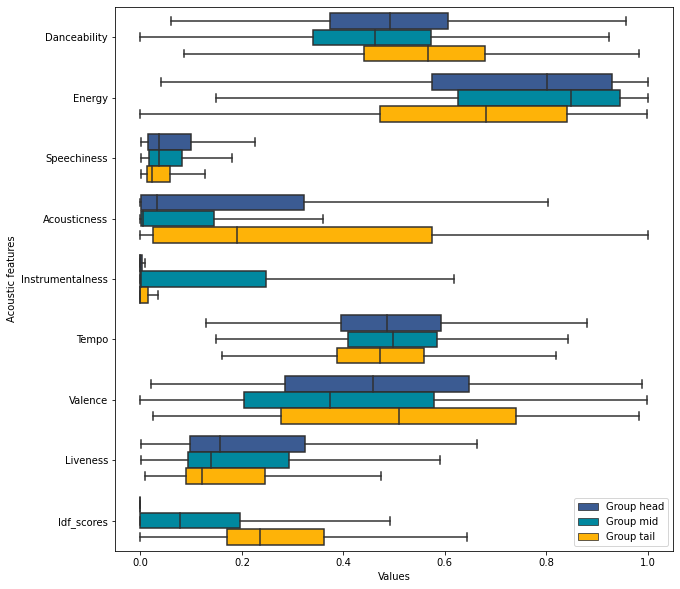

In [31]:
# BeyMS with recommendations from only one group head, mid, tail groups

f = plt.figure(figsize=[10,10])
g = sns.boxplot(data=df, x="value", y="feature", hue="group", showfliers=False, palette=palette, saturation=1, hue_order=['Group head', 'Group mid', 'Group tail'])
plt.legend(loc="lower right")
plt.xlabel("Values")
plt.ylabel("Acoustic features")
plt.grid(False)

In [32]:
df1 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==3')['user_id'])].query('group_name=="Group head"')['user_id'])].query('type_test=="beyms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df1.columns = [feature.capitalize() for feature in df1.columns]
df1 = df1.stack().reset_index()
df1.columns = ["track_id", "feature", "value"]
df1['group'] = 'Group head'

In [33]:
df2 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==3')['user_id'])].query('group_name=="Group mid"')['user_id'])].query('type_test=="beyms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df2.columns = [feature.capitalize() for feature in df2.columns]
df2 = df2.stack().reset_index()
df2.columns = ["track_id", "feature", "value"]
df2['group'] = 'Group mid'

In [34]:
df3 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_beyms_idf[reco_stat_beyms_idf['user_id'].isin(user_grp_beyms_idf.query('groups==3')['user_id'])].query('group_name=="Group tail"')['user_id'])].query('type_test=="beyms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df3.columns = [feature.capitalize() for feature in df3.columns]
df3 = df3.stack().reset_index()
df3.columns = ["track_id", "feature", "value"]
df3['group'] = 'Group tail'

In [35]:
df = pd.concat([df1,df2,df3])

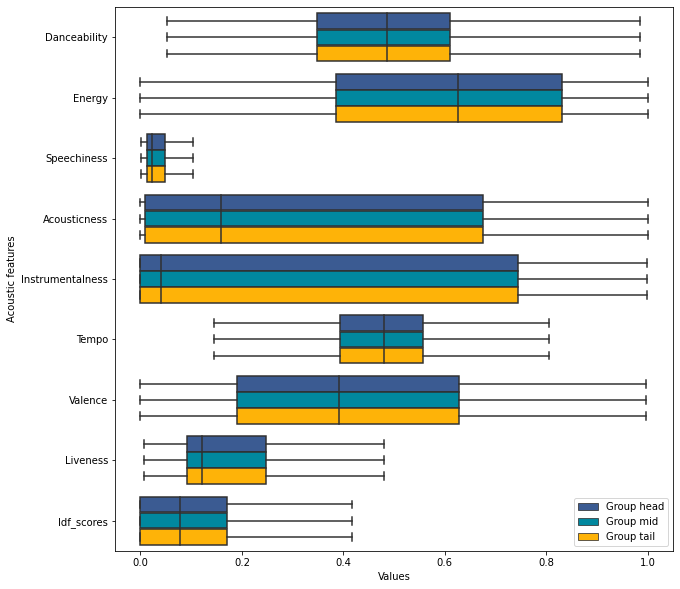

In [36]:
# BeyMS with recommendations from 3 groups head, mid, tail groups

f = plt.figure(figsize=[10,10])
g = sns.boxplot(data=df, x="value", y="feature", hue="group", showfliers=False, palette=palette, saturation=1, hue_order=['Group head', 'Group mid', 'Group tail'])
plt.legend(loc="lower right")
plt.xlabel("Values")
plt.ylabel("Acoustic features")
plt.grid(False)

In [37]:
df1 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==1')['user_id'])].query('group_name=="Group head"')['user_id'])].query('type_test=="ms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df1.columns = [feature.capitalize() for feature in df1.columns]
df1 = df1.stack().reset_index()
df1.columns = ["track_id", "feature", "value"]
df1['group'] = 'Group head'

In [38]:
df2 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==1')['user_id'])].query('group_name=="Group mid"')['user_id'])].query('type_test=="ms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df2.columns = [feature.capitalize() for feature in df2.columns]
df2 = df2.stack().reset_index()
df2.columns = ["track_id", "feature", "value"]
df2['group'] = 'Group mid'

In [39]:
df3 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==1')['user_id'])].query('group_name=="Group tail"')['user_id'])].query('type_test=="ms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df3.columns = [feature.capitalize() for feature in df3.columns]
df3 = df3.stack().reset_index()
df3.columns = ["track_id", "feature", "value"]
df3['group'] = 'Group tail'

In [40]:
df = pd.concat([df1,df2,df3])

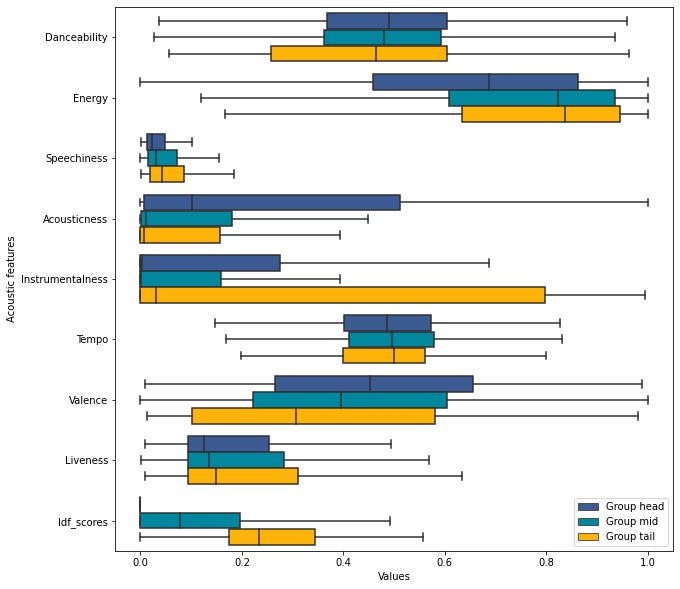

In [41]:
# MS with recommendations from only one group head, mid, tail groups

f = plt.figure(figsize=[10,10])
g = sns.boxplot(data=df, x="value", y="feature", hue="group", showfliers=False, palette=palette, saturation=1, hue_order=['Group head', 'Group mid', 'Group tail'])
plt.legend(loc="lower right")
plt.xlabel("Values")
plt.ylabel("Acoustic features")
plt.grid(False)

In [42]:
df1 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==3')['user_id'])].query('group_name=="Group head"')['user_id'])].query('type_test=="ms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df1.columns = [feature.capitalize() for feature in df1.columns]
df1 = df1.stack().reset_index()
df1.columns = ["track_id", "feature", "value"]
df1['group'] = 'Group head'

In [43]:
df2 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==3')['user_id'])].query('group_name=="Group mid"')['user_id'])].query('type_test=="ms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df2.columns = [feature.capitalize() for feature in df2.columns]
df2 = df2.stack().reset_index()
df2.columns = ["track_id", "feature", "value"]
df2['group'] = 'Group mid'

In [44]:
df3 = pd.merge(pd.merge(train_set[train_set['user_id'].isin(reco_stat_ms_idf[reco_stat_ms_idf['user_id'].isin(user_grp_ms_idf.query('groups==3')['user_id'])].query('group_name=="Group tail"')['user_id'])].query('type_test=="ms_idf"')
,tracks_sample),features_df)[t_feat].set_index('track_id')
df3.columns = [feature.capitalize() for feature in df3.columns]
df3 = df3.stack().reset_index()
df3.columns = ["track_id", "feature", "value"]
df3['group'] = 'Group tail'

In [45]:
df = pd.concat([df1,df2,df3])

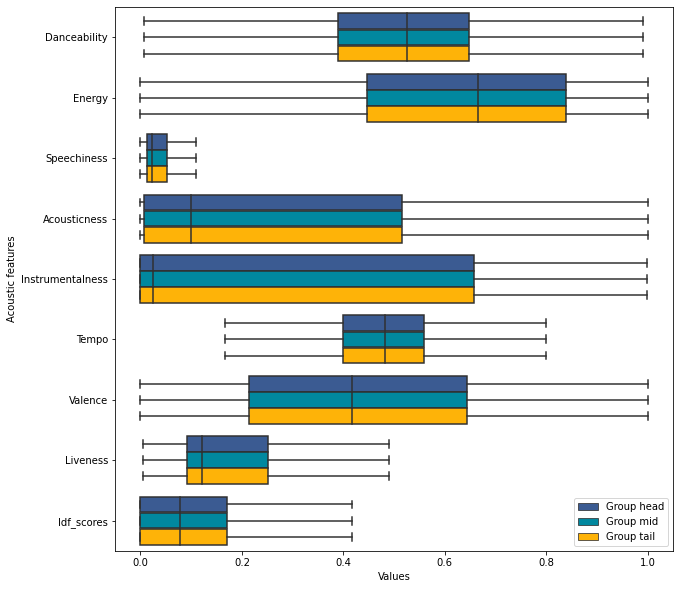

In [46]:
# BeyMS with recommendations from 3 groups head, mid, tail groups

f = plt.figure(figsize=[10,10])
g = sns.boxplot(data=df, x="value", y="feature", hue="group", showfliers=False, palette=palette, saturation=1, hue_order=['Group head', 'Group mid', 'Group tail'])
plt.legend(loc="lower right")
plt.xlabel("Values")
plt.ylabel("Acoustic features")
plt.grid(False)

### Model outputs

#### beyms_idf

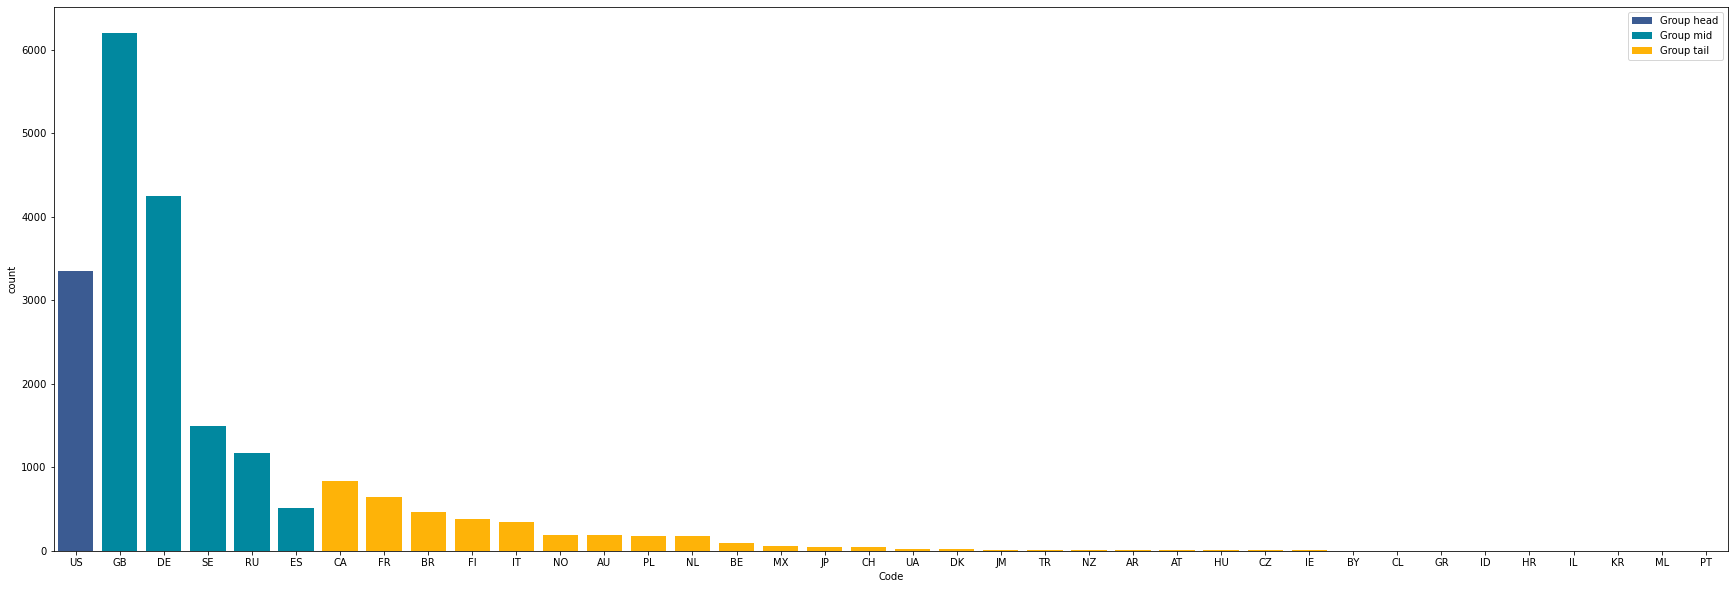

In [47]:
data = reco[(reco['type_test']=='beyms_idf')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count',hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [48]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    32
dtype: int64

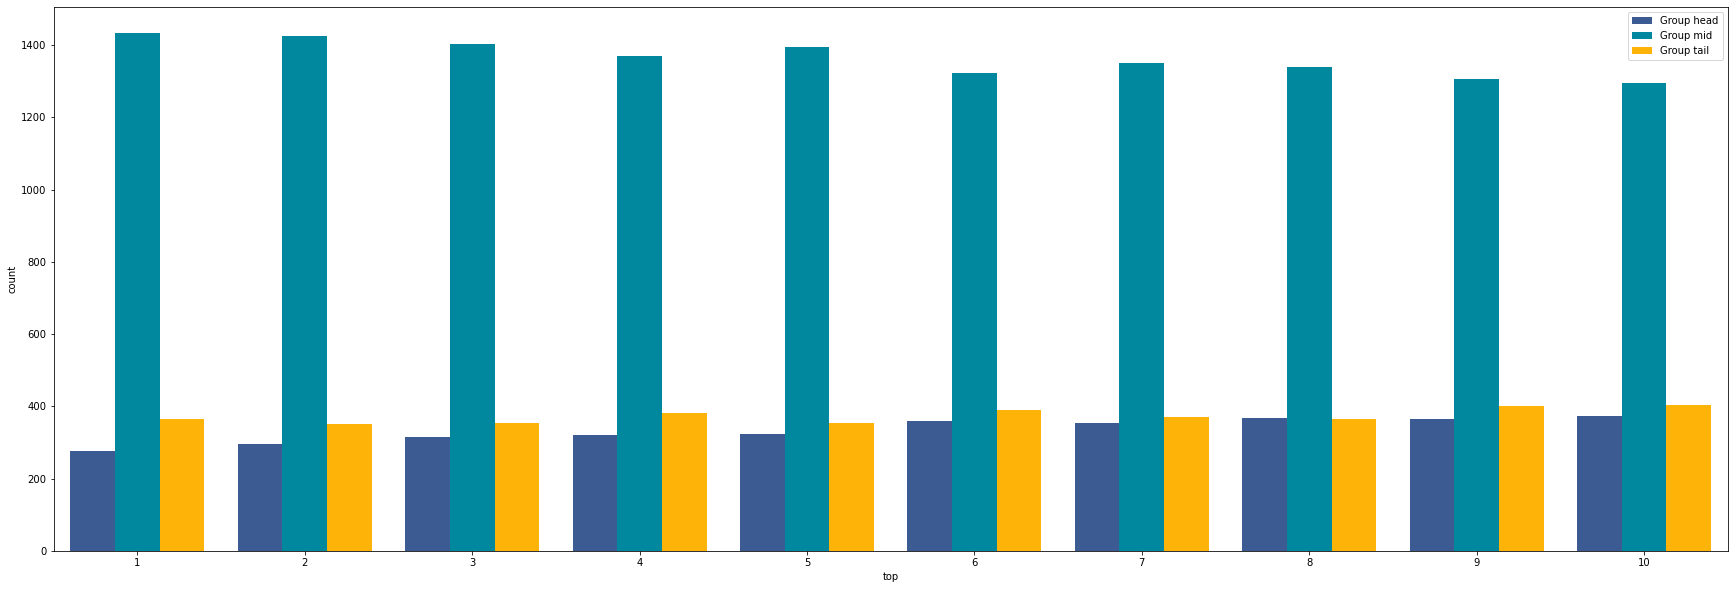

In [49]:
data = reco[(reco['type_test']=='beyms_idf')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [50]:
data.groupby('group_name').sum()

,top,group,count
group_name,,,
Group head,55,10,3352
Group mid,55,20,13642
Group tail,55,30,3736


#### beyms_noidf

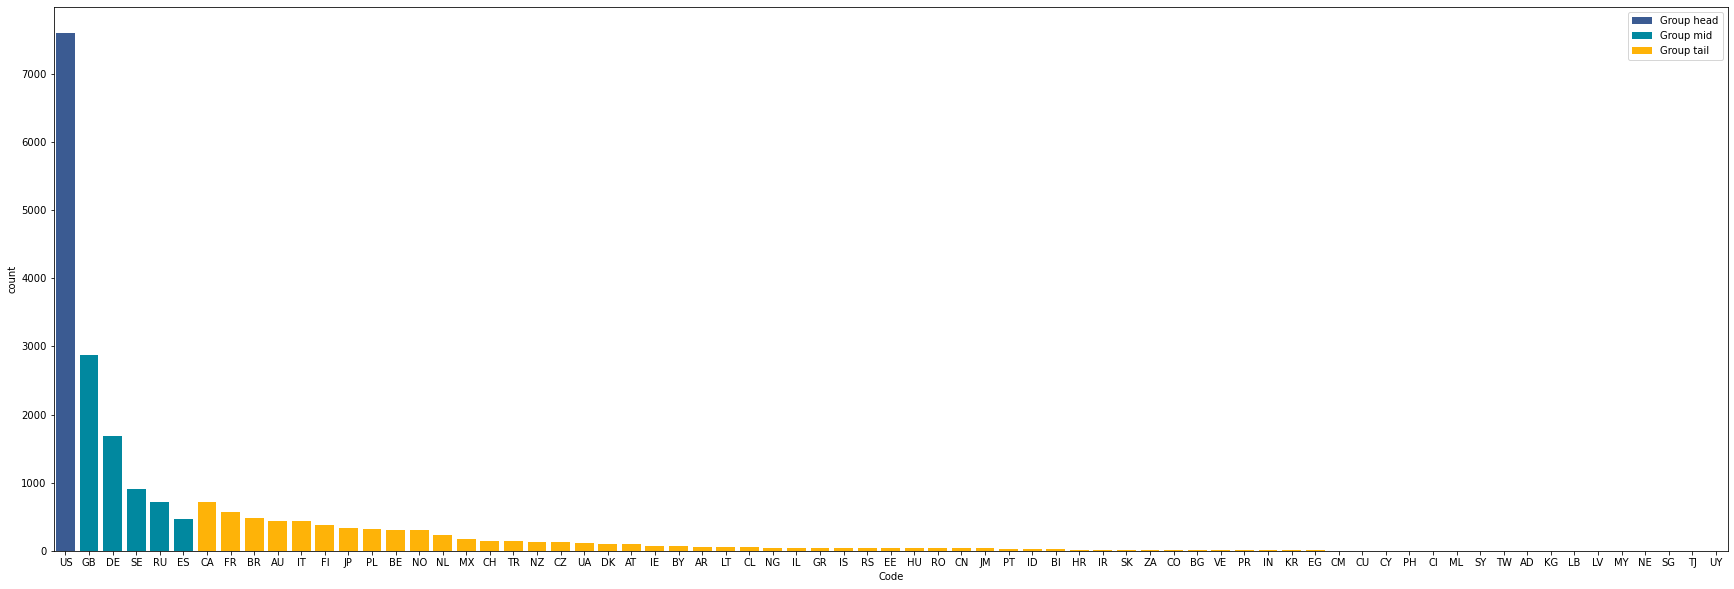

In [51]:
data = reco[(reco['type_test']=='beyms_noidf')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [52]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    65
dtype: int64

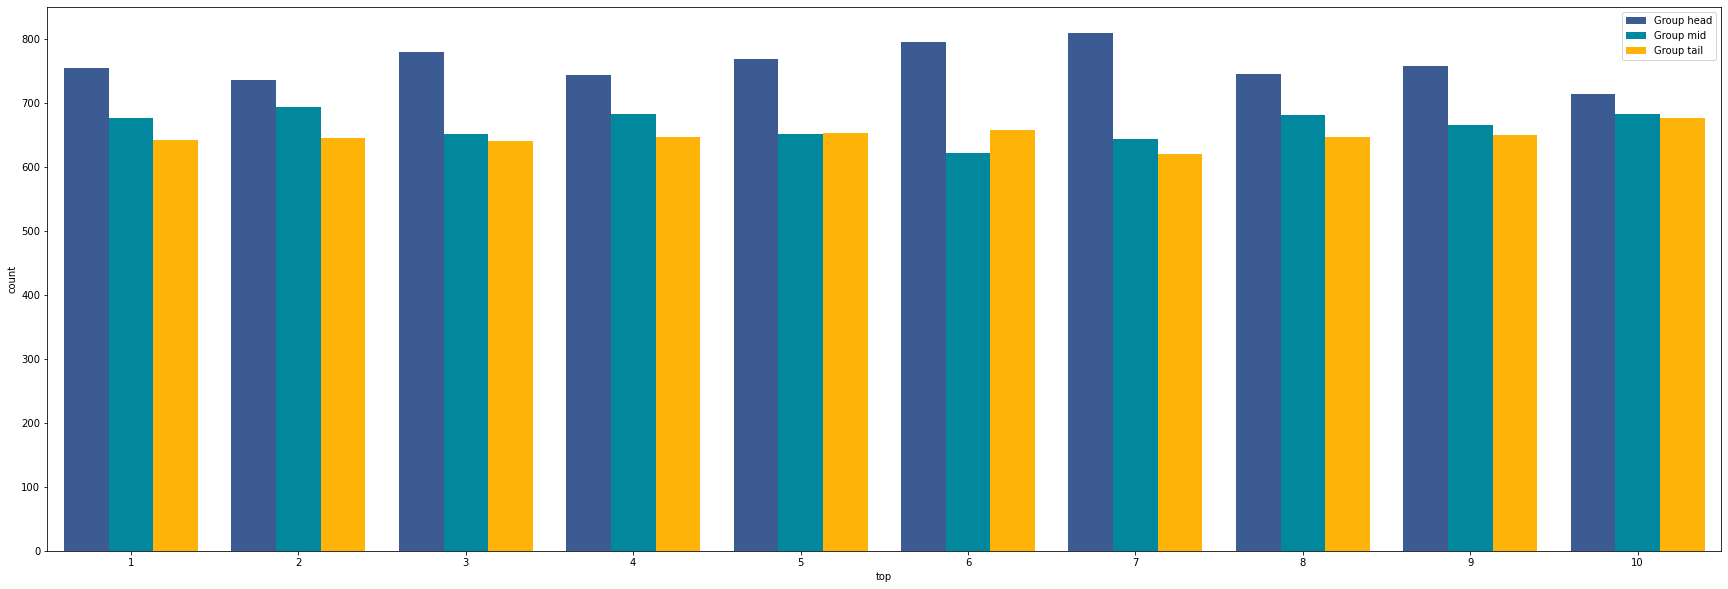

In [53]:
data = reco[(reco['type_test']=='beyms_noidf')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [54]:
data.groupby('group_name').sum()

,top,group,count
group_name,,,
Group head,55,10,7602
Group mid,55,20,6652
Group tail,55,30,6476


#### ms_idf

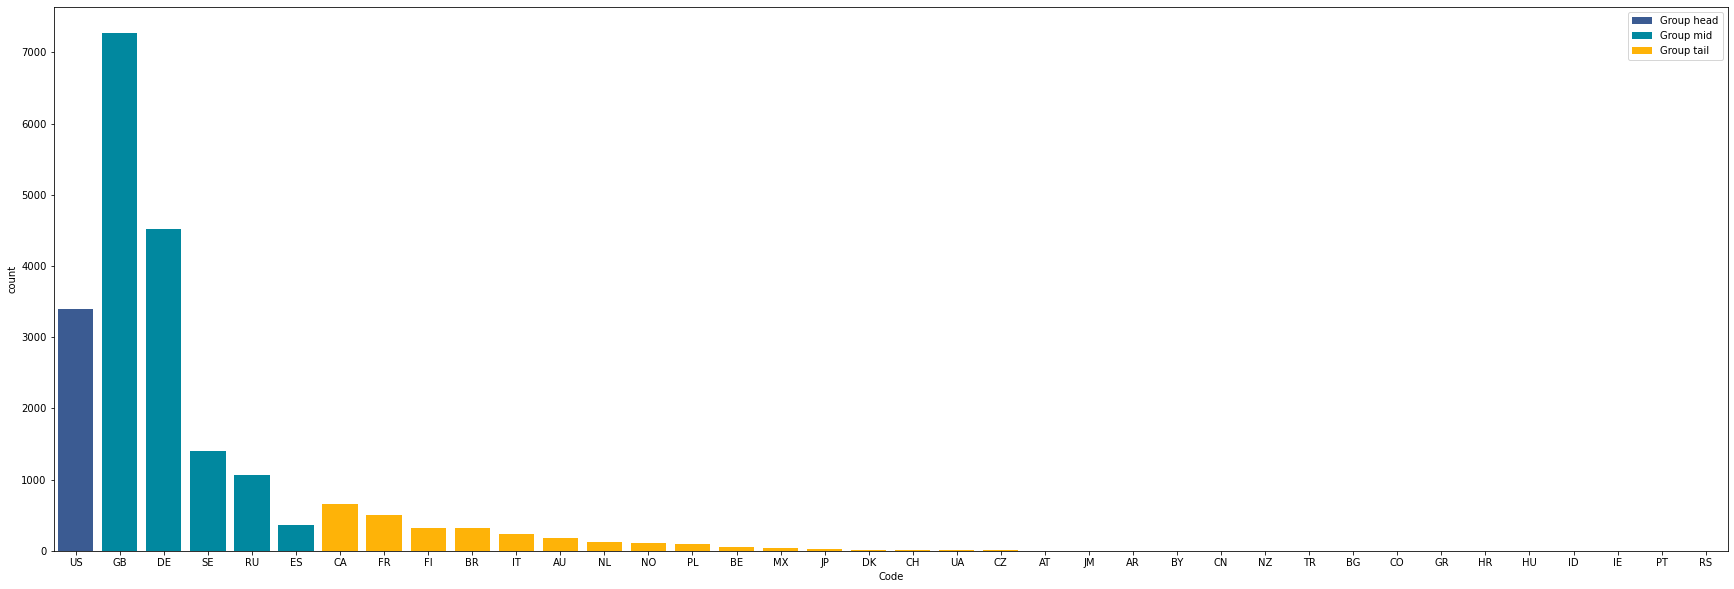

In [55]:
data = reco[(reco['type_test']=='ms_idf')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count',hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [56]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    32
dtype: int64

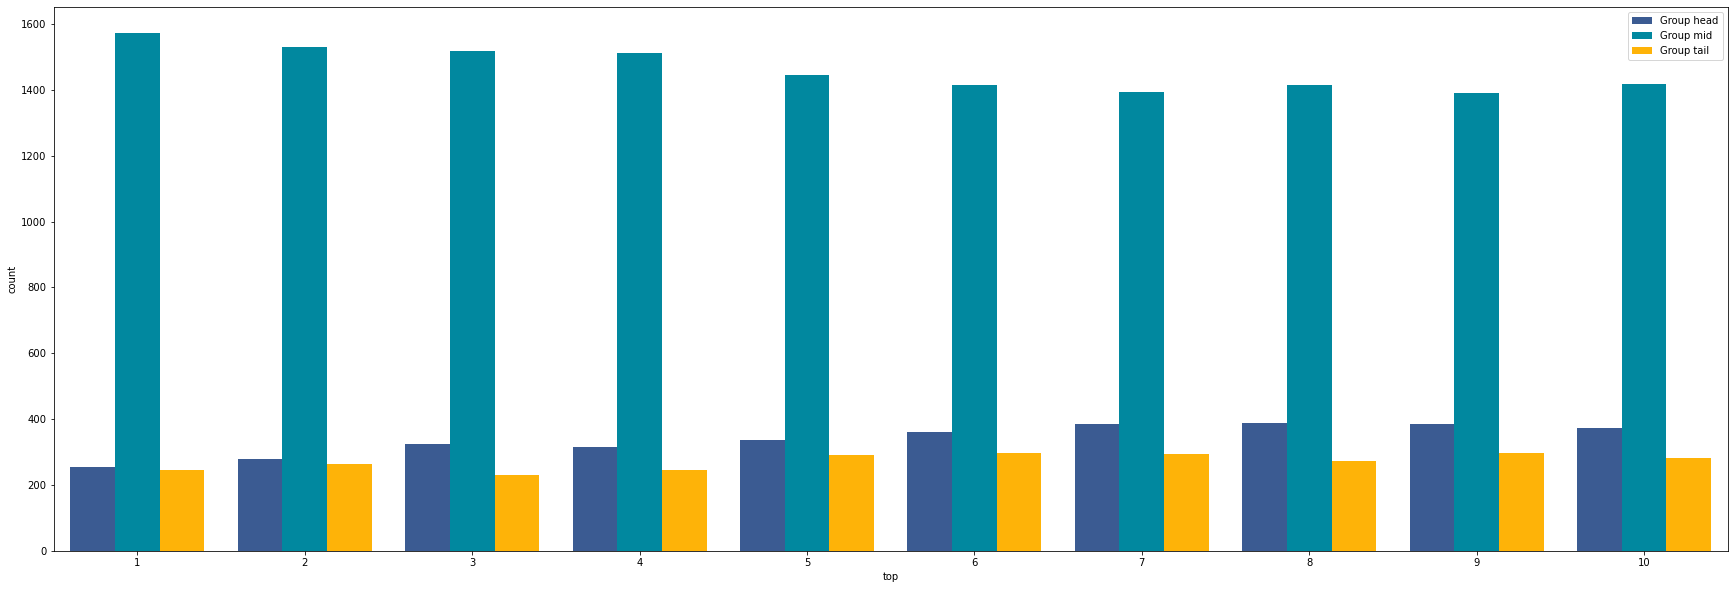

In [57]:
data = reco[(reco['type_test']=='ms_idf')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [58]:
data.groupby('group').sum()

,top,count
group,,
1,55,3402
2,55,14618
3,55,2720


#### ms_noidf

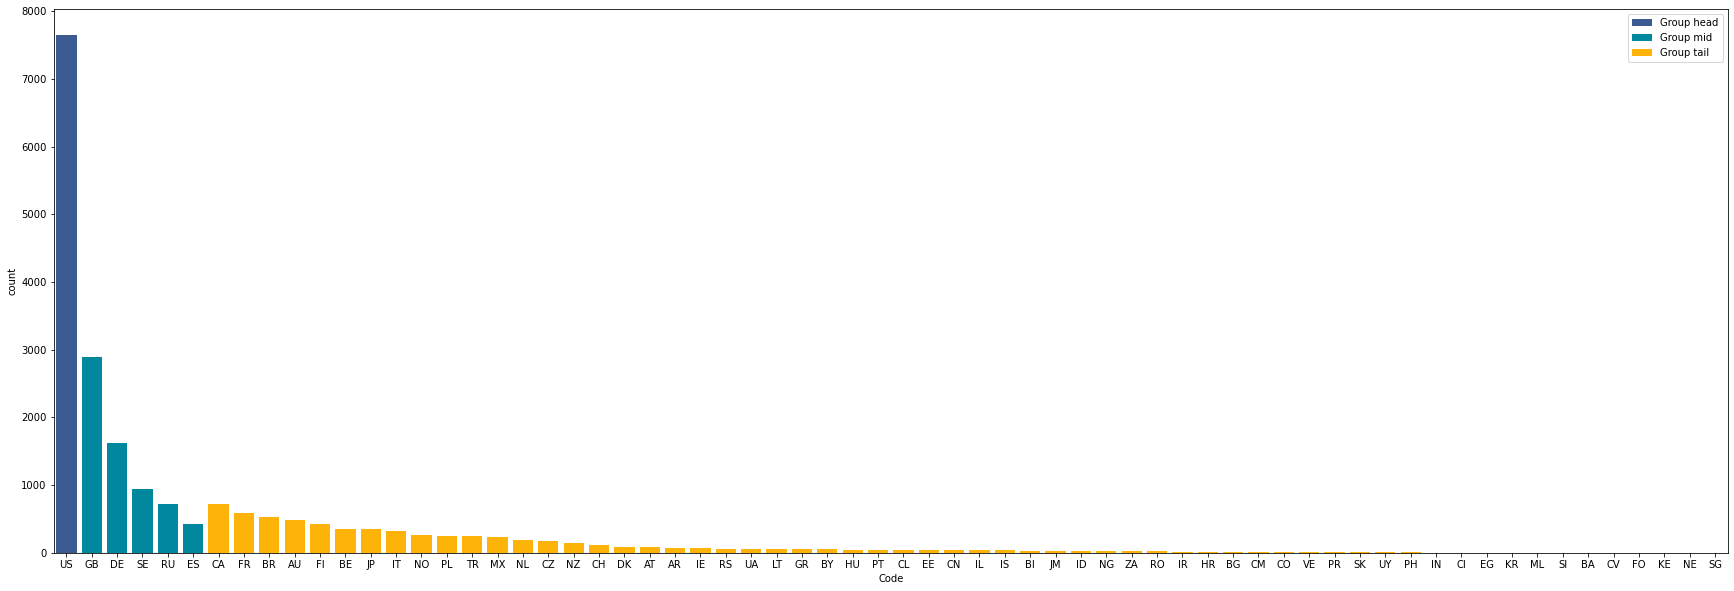

In [59]:
data = reco[(reco['type_test']=='ms_noidf')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [60]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    60
dtype: int64

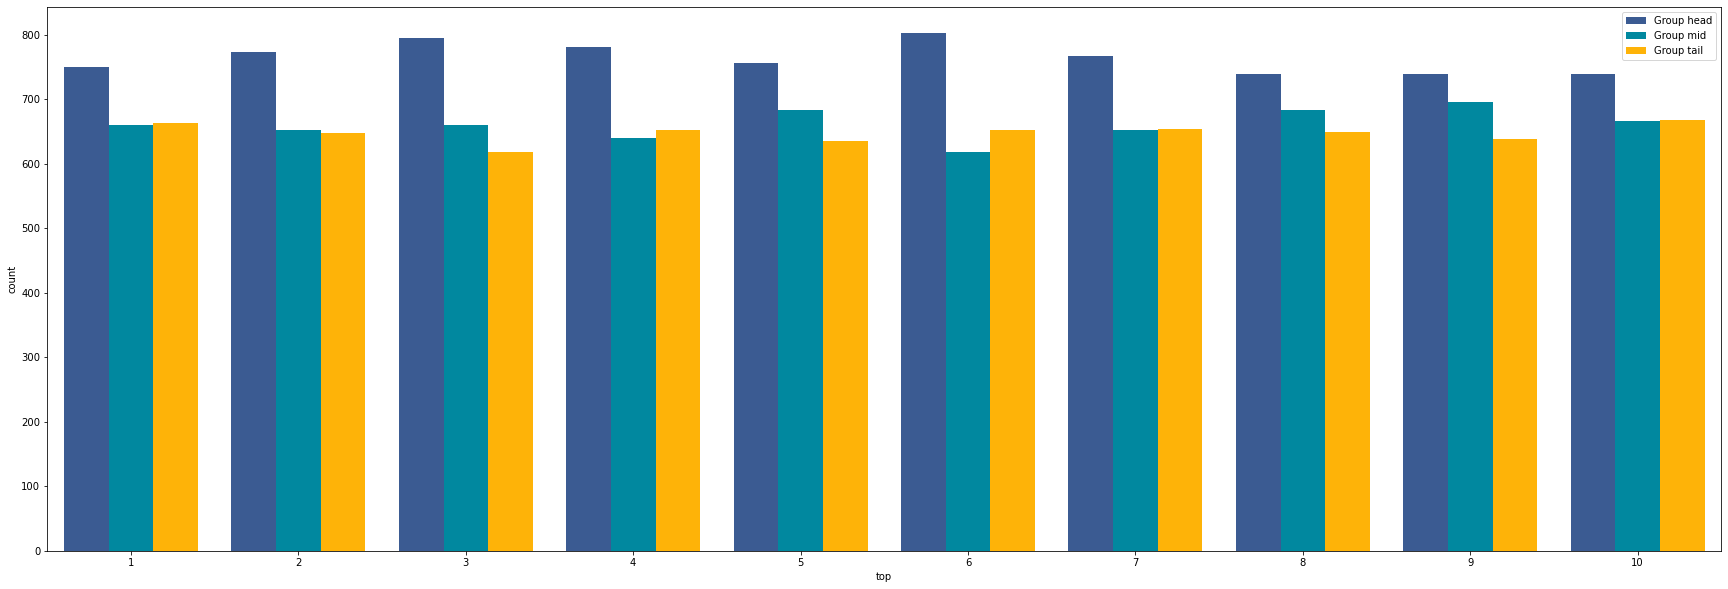

In [61]:
data = reco[(reco['type_test']=='ms_noidf')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [62]:
data.groupby('group').sum()

,top,count
group,,
1,55,7647
2,55,6614
3,55,6479


#### beyms_idf_pca

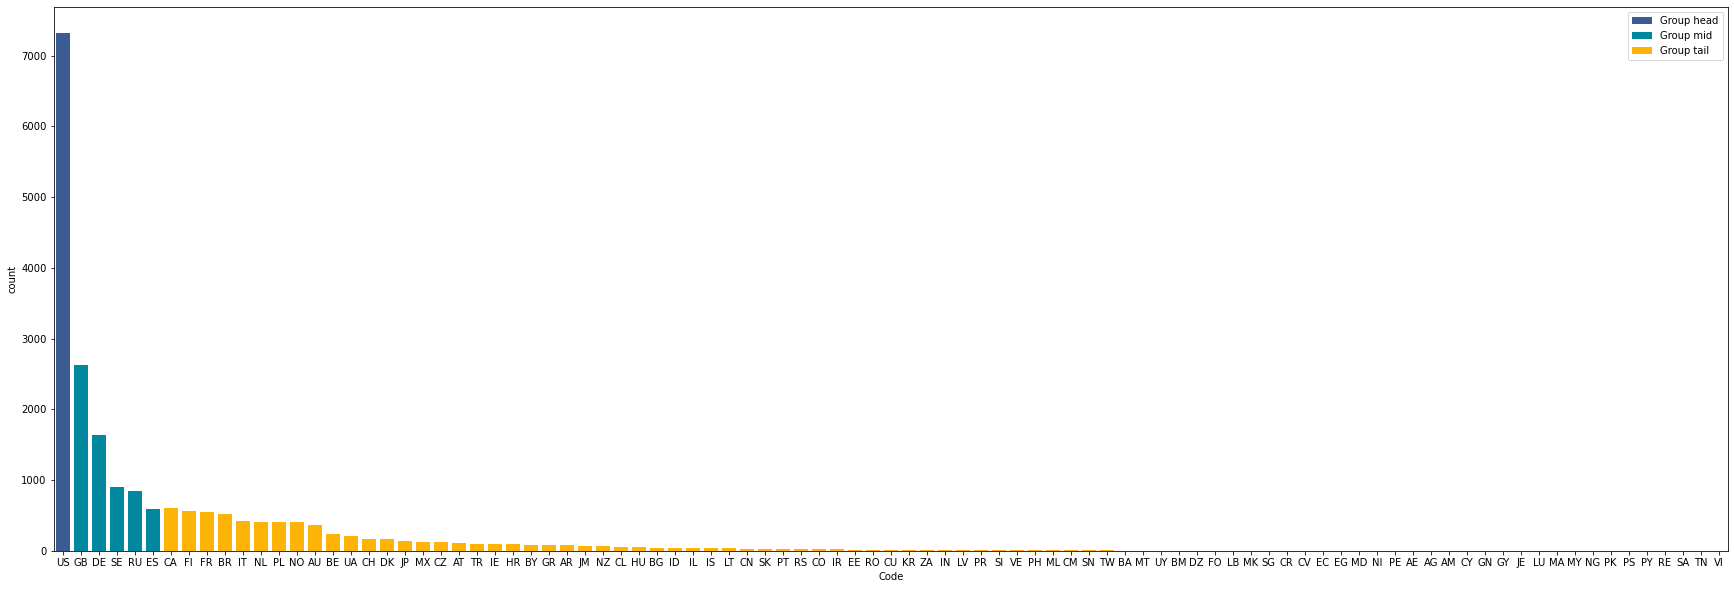

In [63]:
data = reco[(reco['type_test']=='beyms_idf_pca')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [64]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    87
dtype: int64

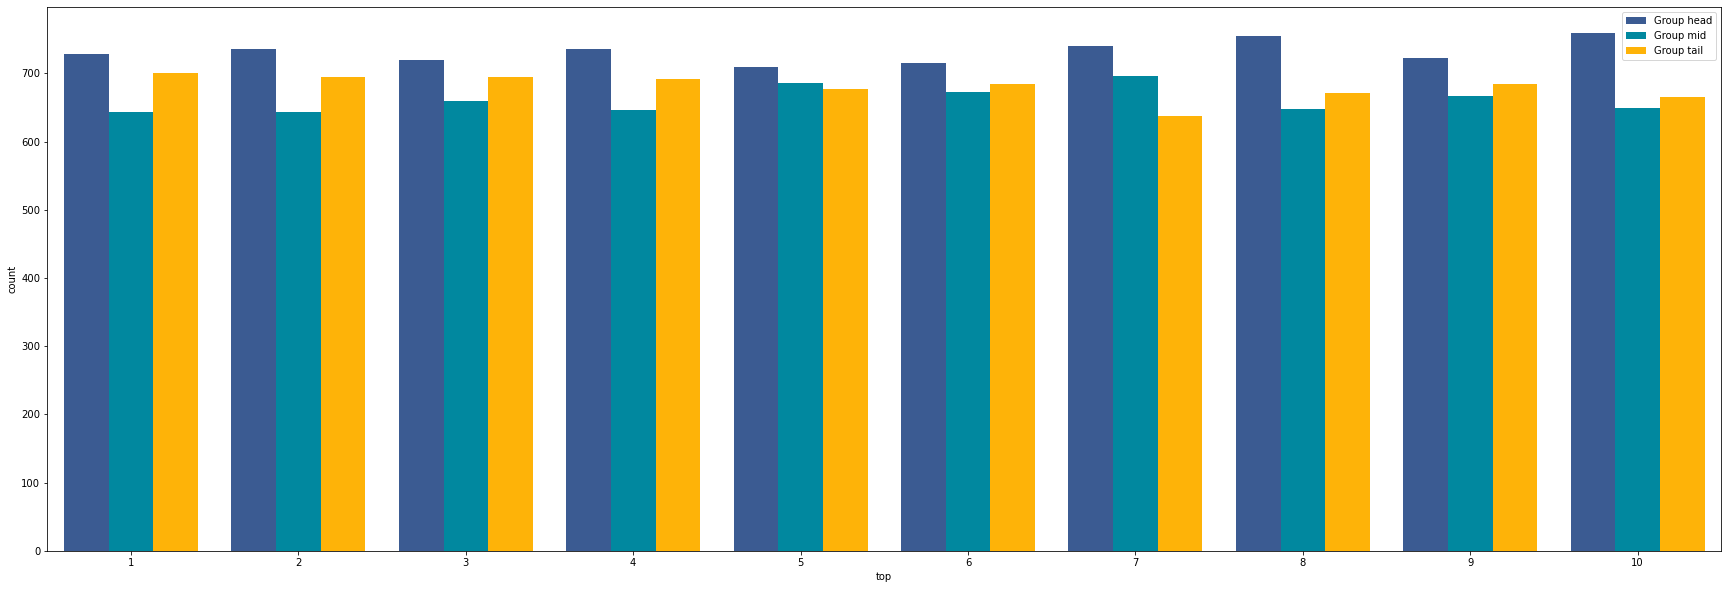

In [65]:
data = reco[(reco['type_test']=='beyms_idf_pca')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [66]:
data.groupby('group').sum()

,top,count
group,,
1,55,7320
2,55,6612
3,55,6798


#### beyms_noidf_pca

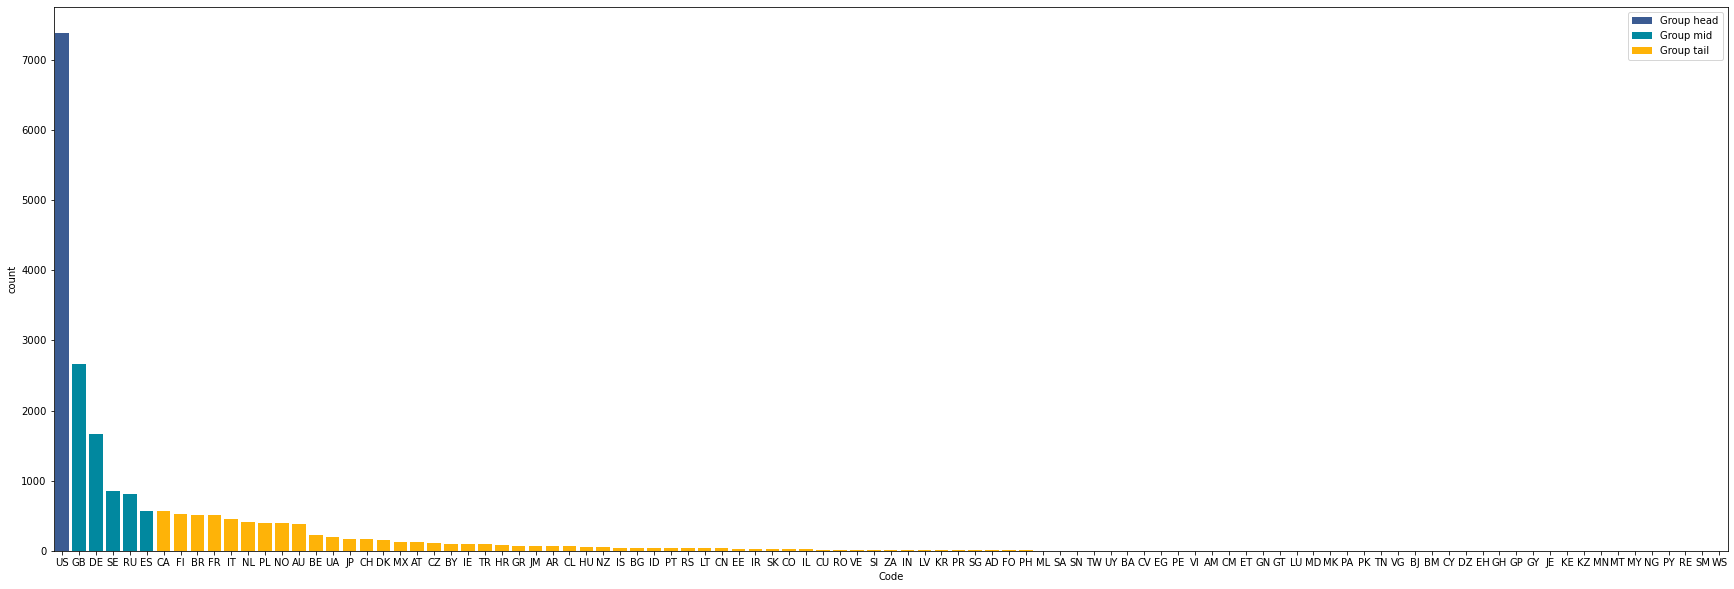

In [67]:
data = reco[(reco['type_test']=='beyms_noidf_pca')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [68]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    93
dtype: int64

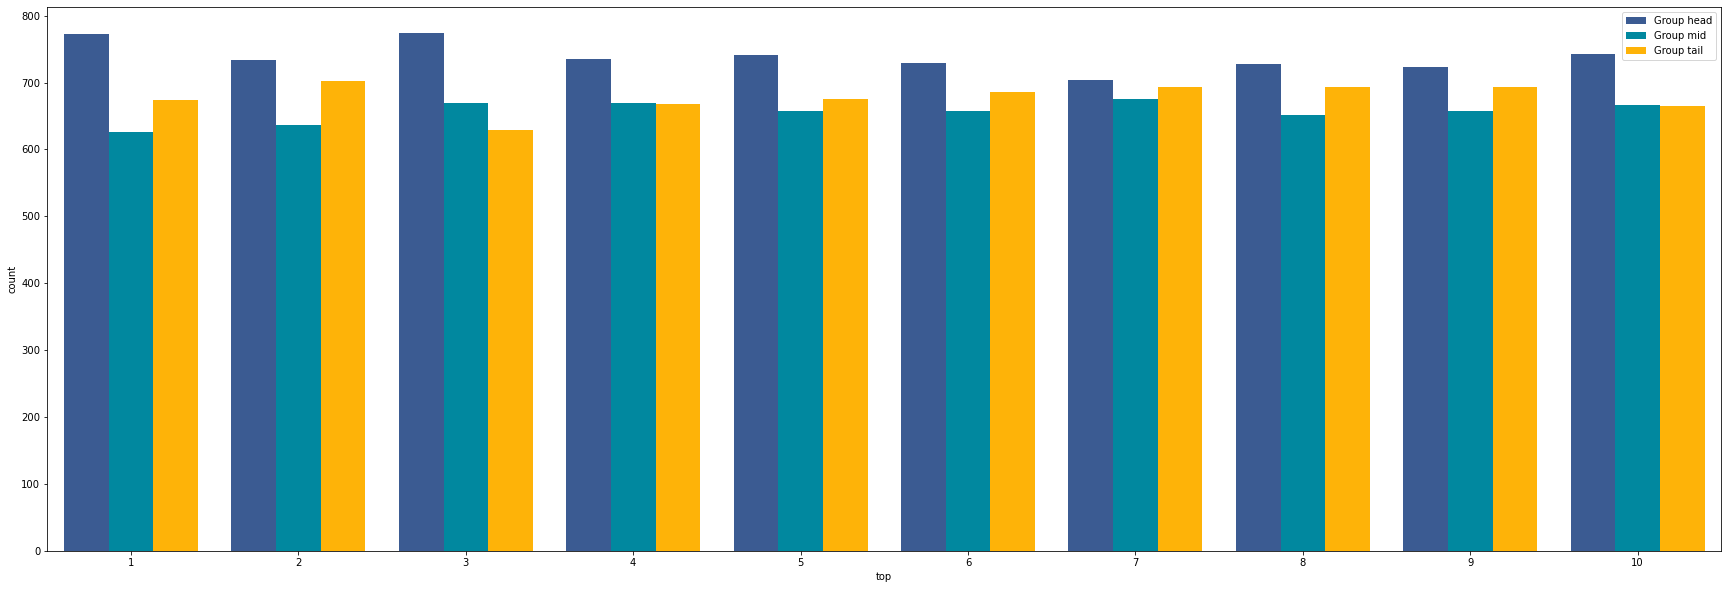

In [69]:
data = reco[(reco['type_test']=='beyms_noidf_pca')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [70]:
data.groupby('group').sum()

,top,count
group,,
1,55,7385
2,55,6564
3,55,6781


#### ms_idf_pca

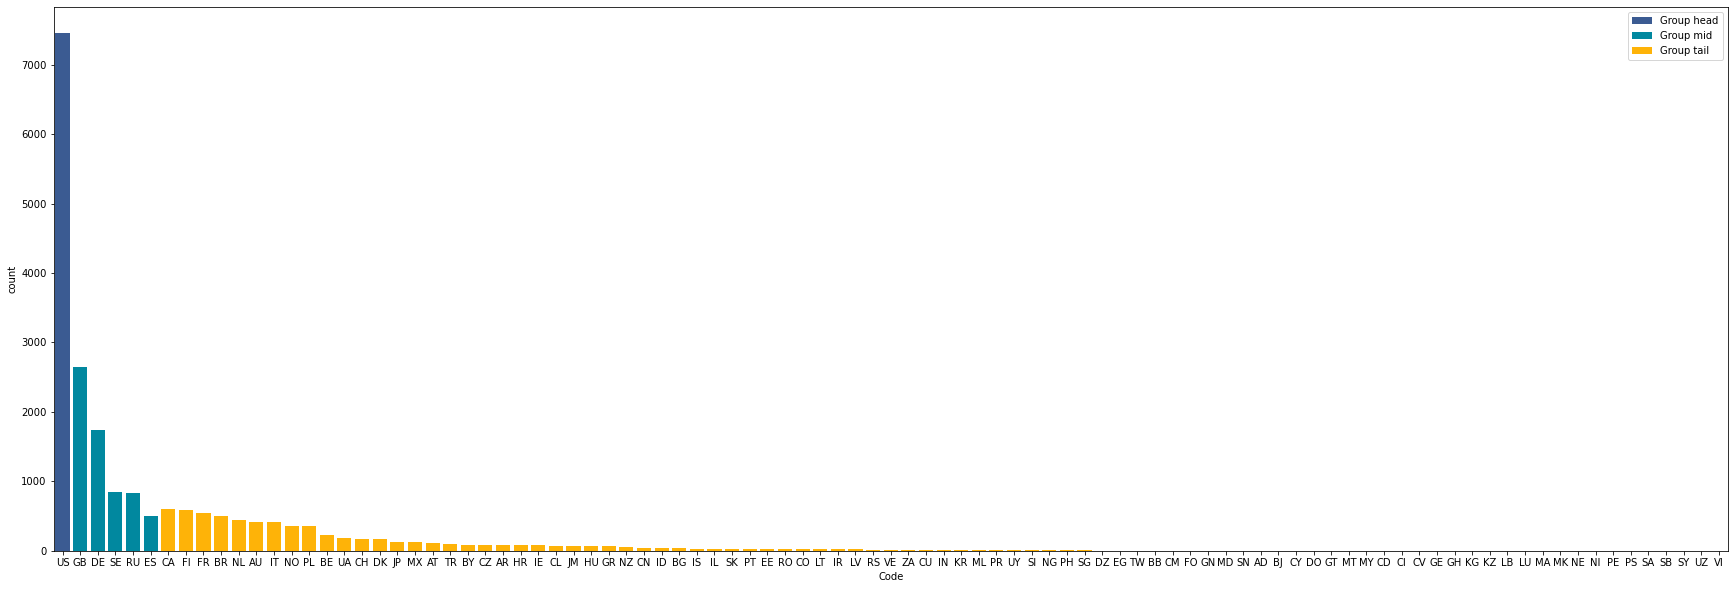

In [71]:
data = reco[(reco['type_test']=='ms_idf_pca')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [72]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    89
dtype: int64

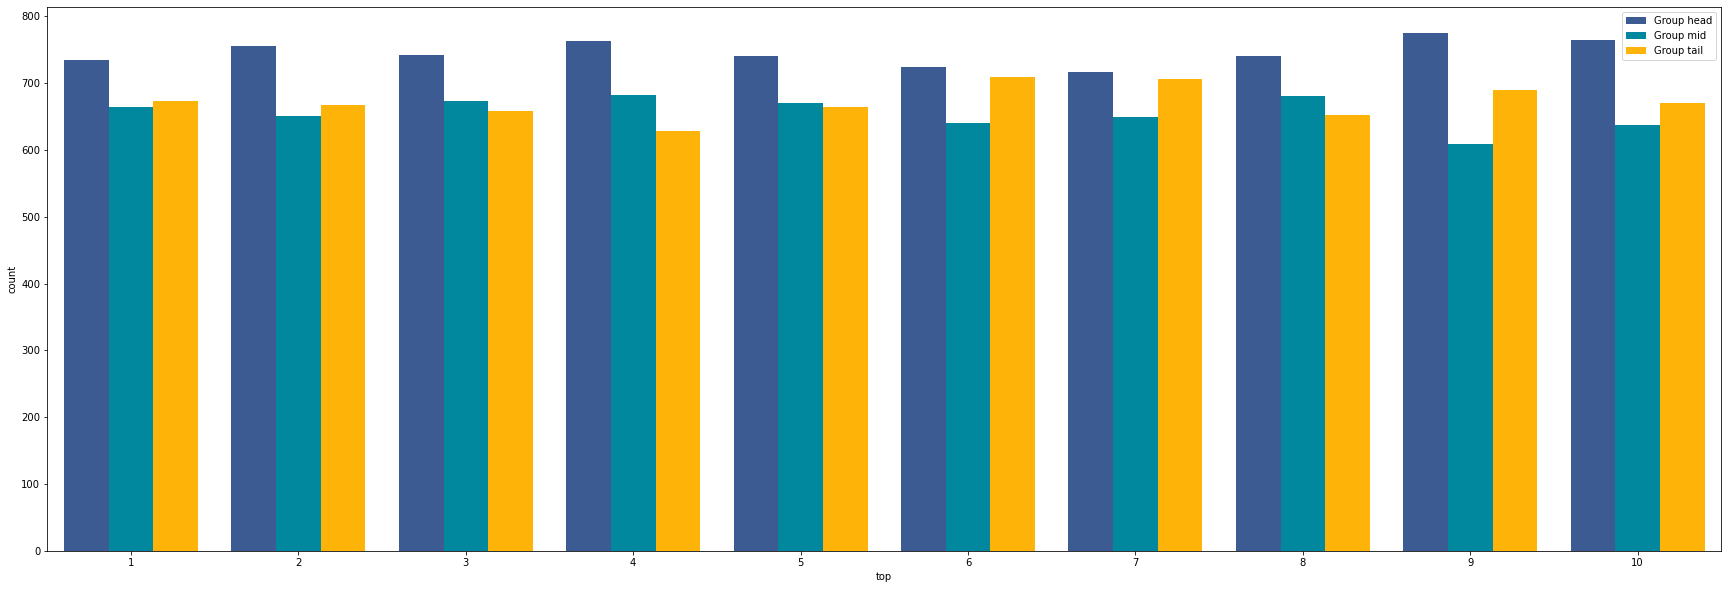

In [73]:
data = reco[(reco['type_test']=='ms_idf_pca')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [74]:
data.groupby('group').sum()

,top,count
group,,
1,55,7456
2,55,6562
3,55,6722


#### ms_noidf_pca

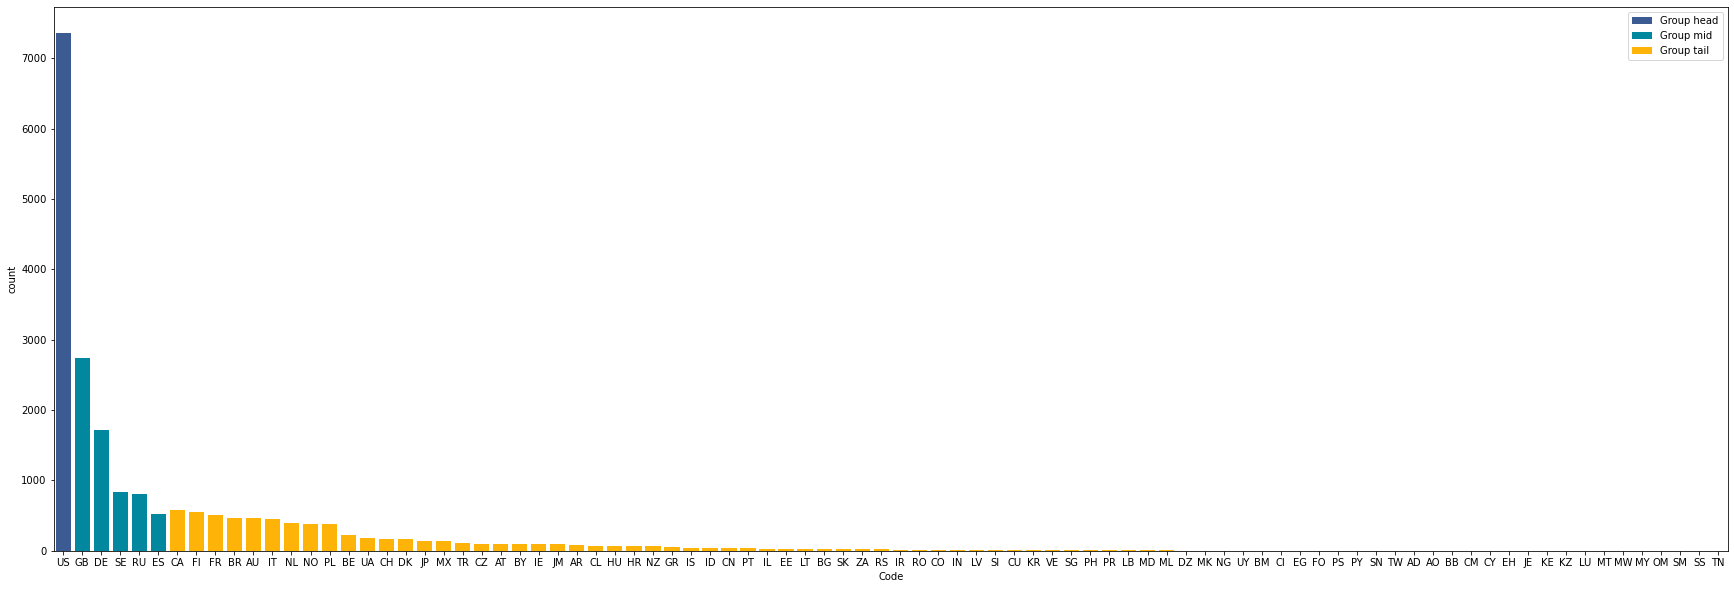

In [75]:
data = reco[(reco['type_test']=='ms_noidf_pca')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [76]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    82
dtype: int64

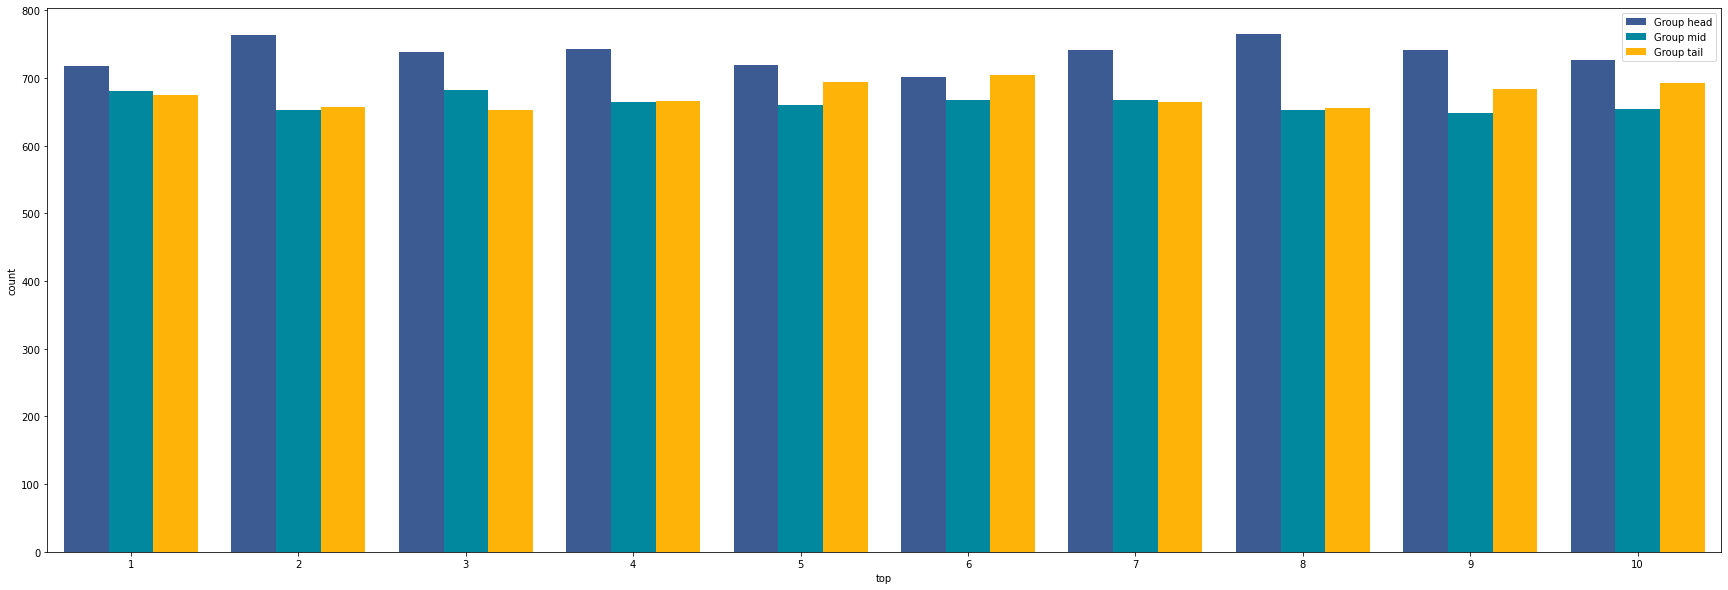

In [77]:
data = reco[(reco['type_test']=='ms_noidf_pca')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [78]:
data.groupby('group').sum()

,top,count
group,,
1,55,7360
2,55,6632
3,55,6748


#### beyms_rnd

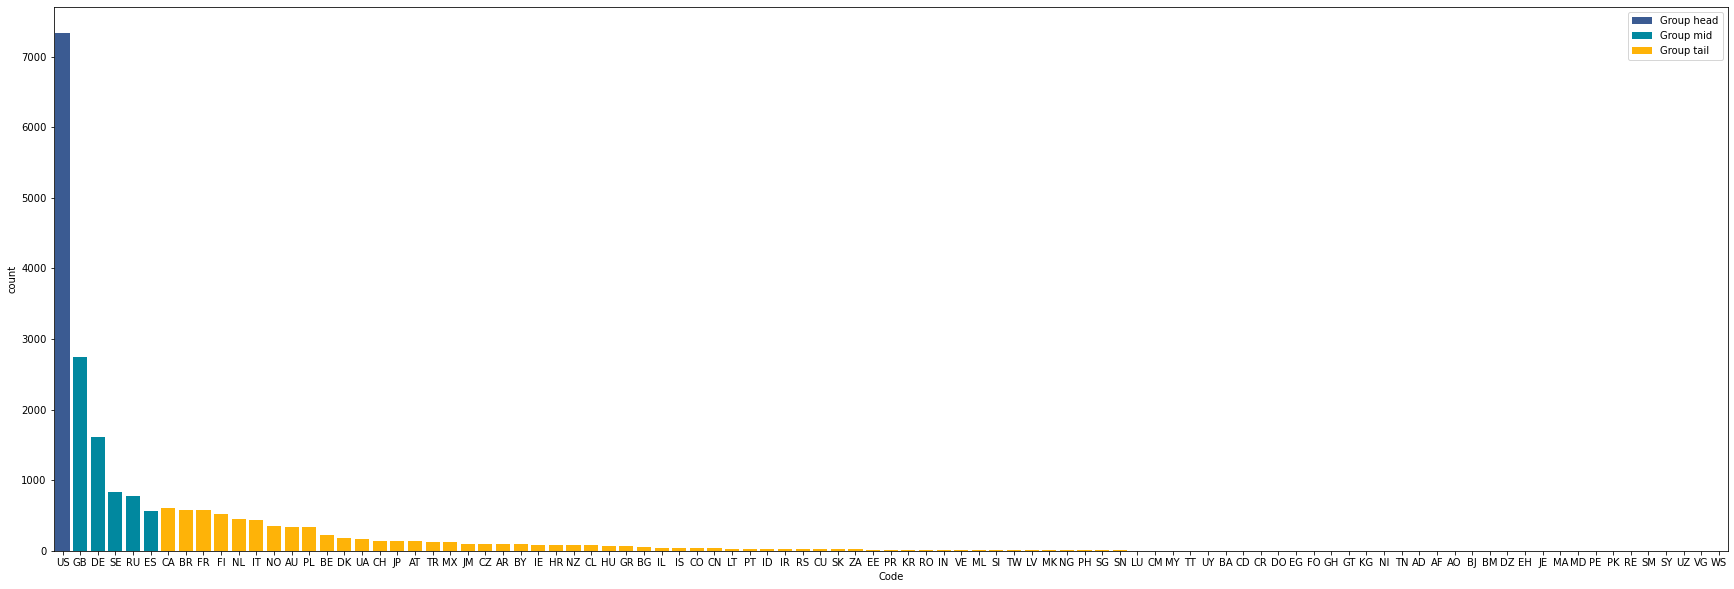

In [79]:
data = reco[(reco['type_test']=='beyms_rnd')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [80]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    89
dtype: int64

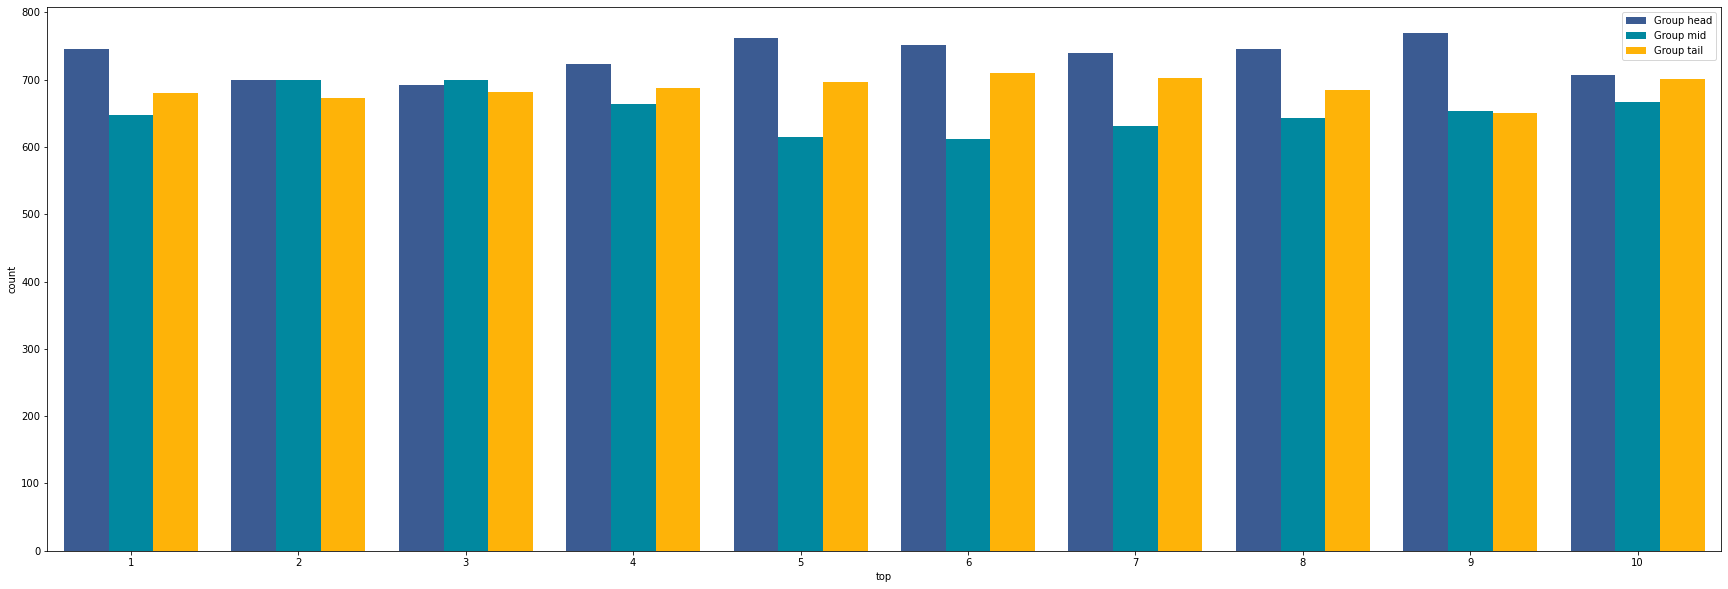

In [81]:
data = reco[(reco['type_test']=='beyms_rnd')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [82]:
data.groupby('group').sum()

,top,count
group,,
1,55,7334
2,55,6529
3,55,6867


#### ms_rnd

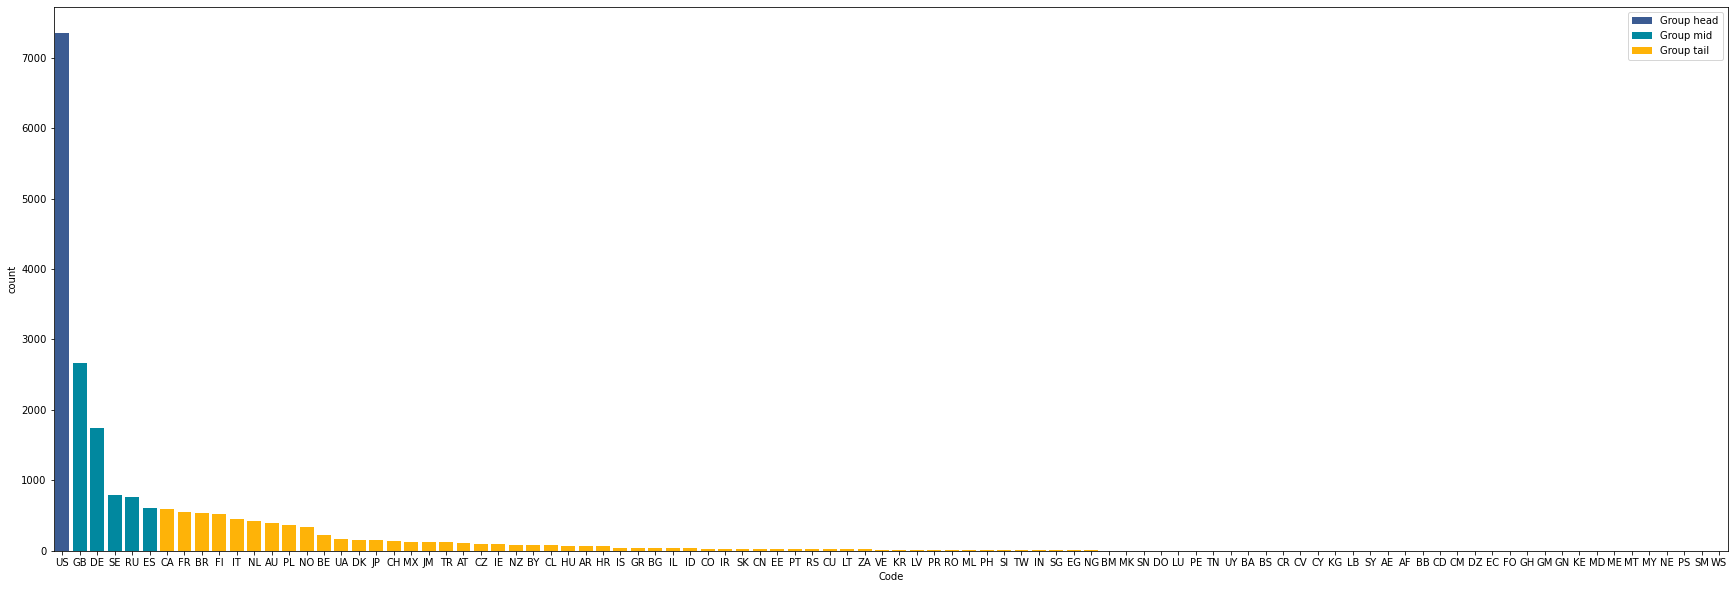

In [83]:
data = reco[(reco['type_test']=='ms_rnd')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [84]:
data.groupby('group_name').size()

group_name
Group head     1
Group mid      5
Group tail    90
dtype: int64

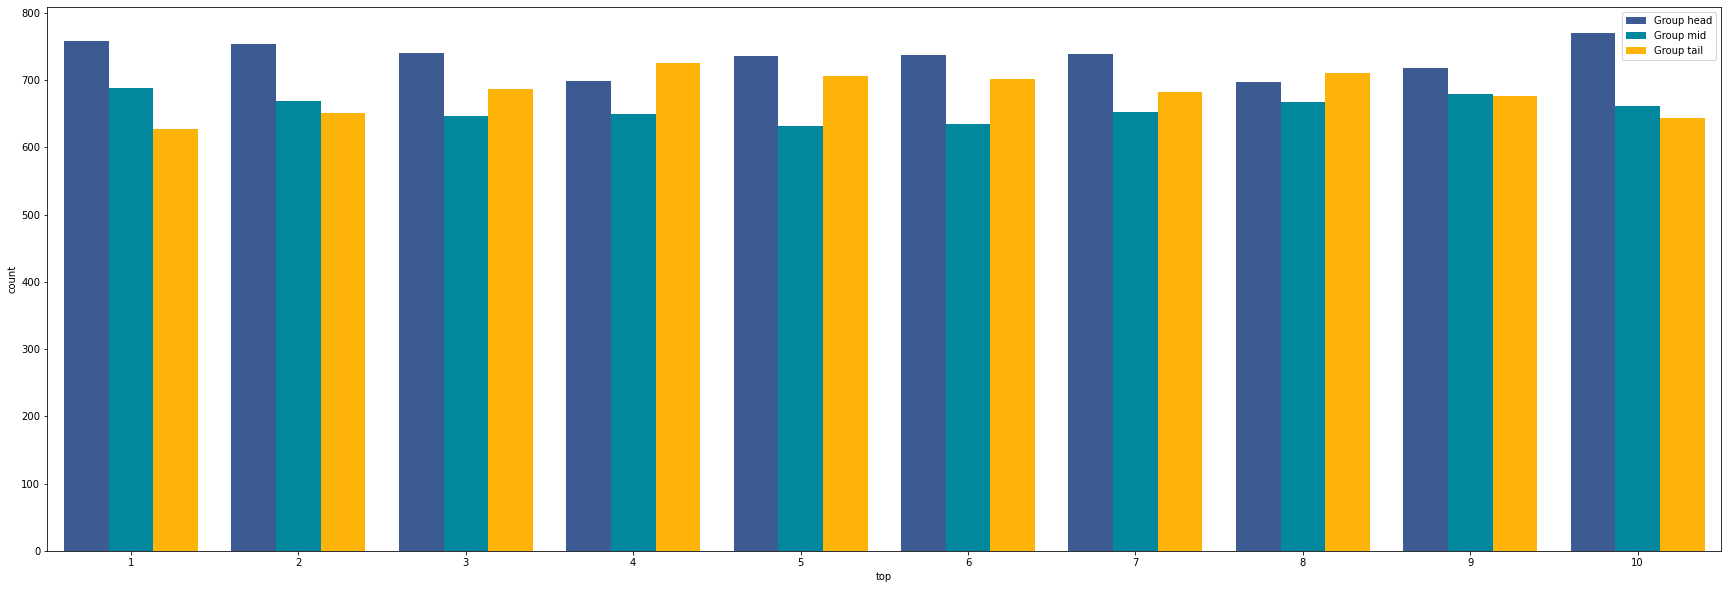

In [85]:
data = reco[(reco['type_test']=='ms_rnd')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

In [86]:
data.groupby('group').sum()

,top,count
group,,
1,55,7348
2,55,6582
3,55,6810


#### beyms_pop

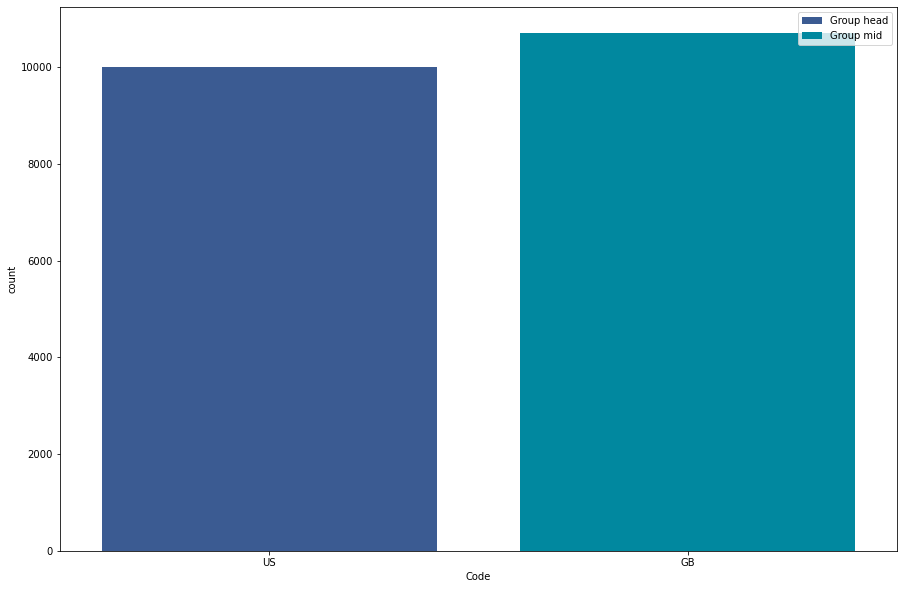

In [87]:
data = reco[(reco['type_test']=='beyms_pop')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(15,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

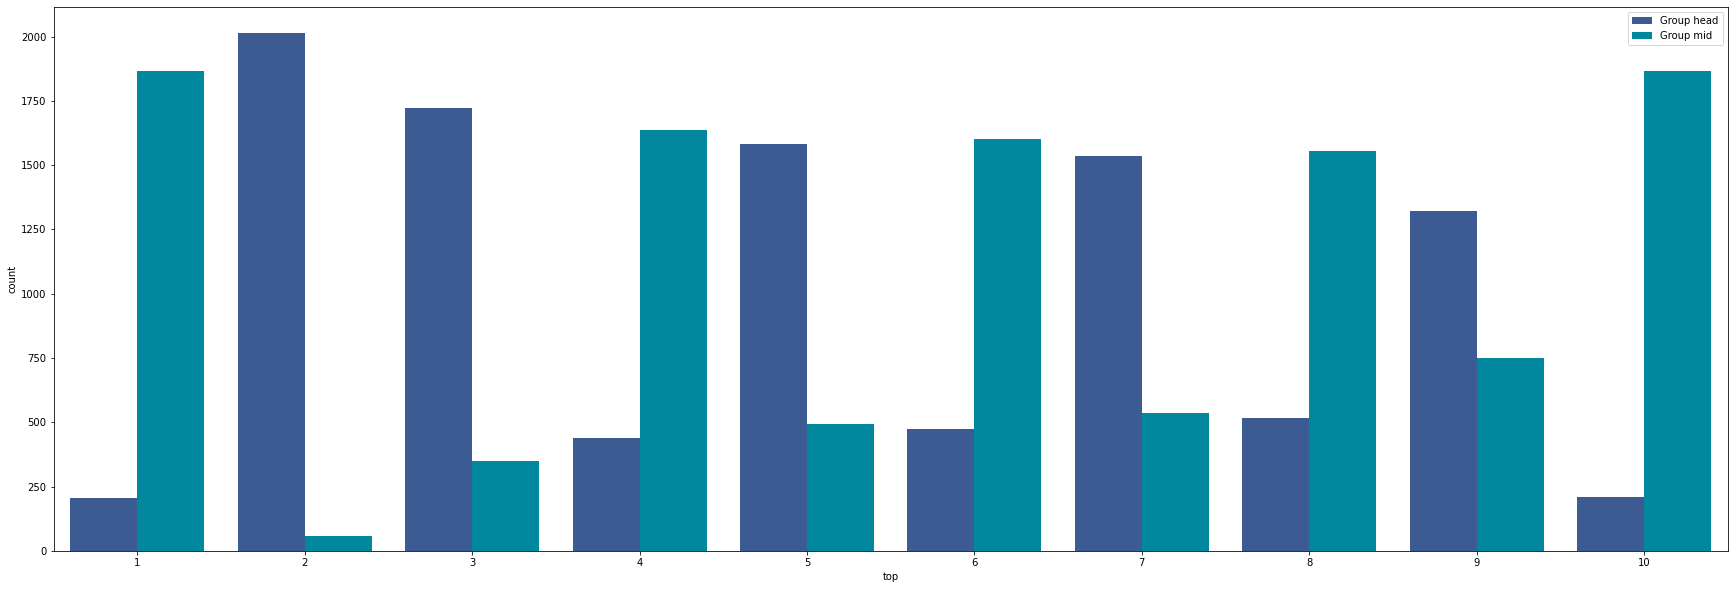

In [88]:
data = reco[(reco['type_test']=='beyms_pop')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")

#### ms_pop

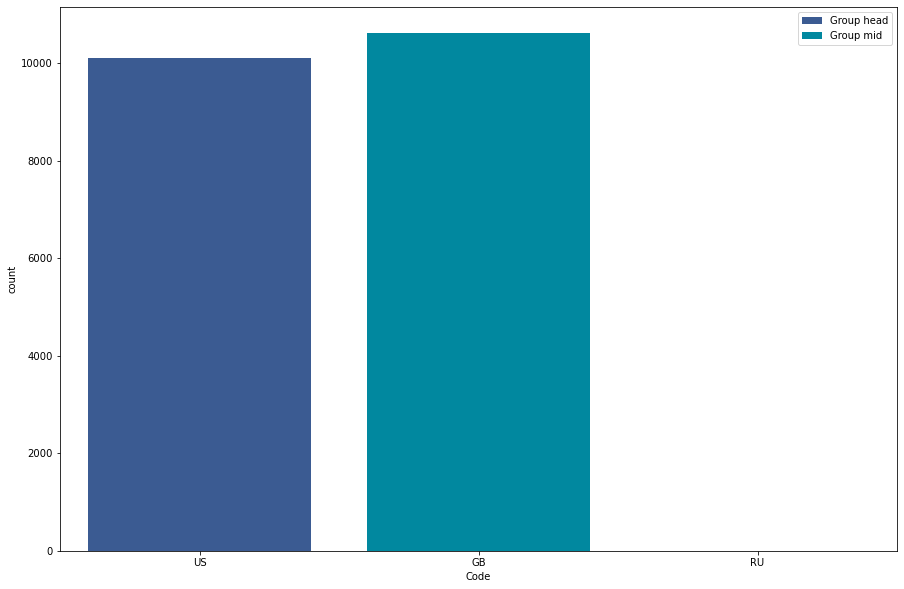

In [89]:
data = reco[(reco['type_test']=='ms_pop')].groupby(['Code','group_name']).size().reset_index().sort_values(['group_name',0],ascending=[True, False])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(15,10))
ax = sns.barplot(x='Code',y='count' ,hue='group_name', data=data, palette=palette, saturation=1, dodge=False)
plt.legend(loc="upper right")

In [90]:
data.groupby('group_name').size()

group_name
Group head    1
Group mid     2
dtype: int64

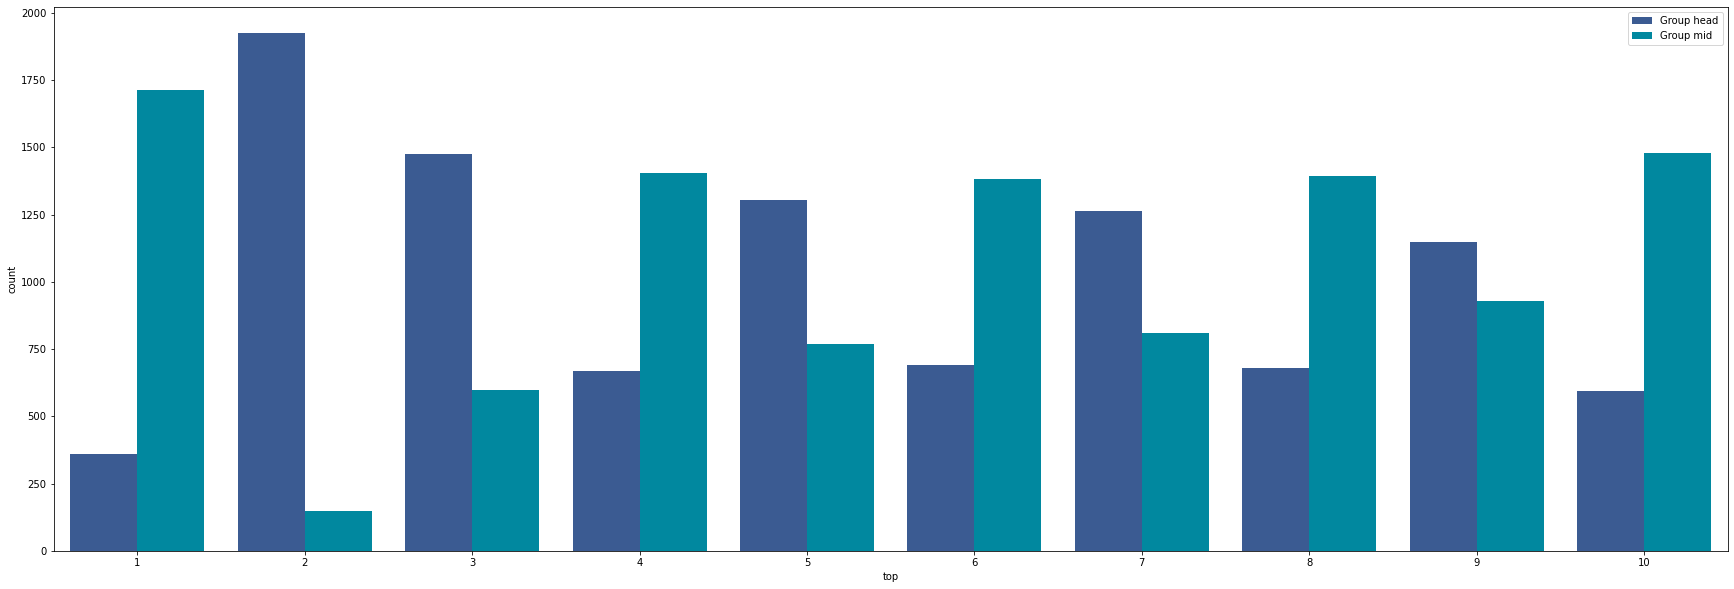

In [91]:
data = reco[(reco['type_test']=='ms_pop')].groupby(['top','group_name','group']).size().reset_index().sort_values(['top','group'],ascending=[True,True])
data = data.rename(columns={0:'count'})
f = plt.figure(figsize=(30,10))
ax = sns.barplot(x='top',y='count',hue='group_name', data=data, palette=palette, saturation=1)
plt.legend(loc="upper right")